<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Names      6 non-null      object 
 1   Max_Temp   6 non-null      float64
 2   Min_Temp   6 non-null      float64
 3   Humidity   6 non-null      int64  
 4   WindSpeed  6 non-null      float64
dtypes: float64(3), int64(1), object(1)
memory usage: 368.0+ bytes


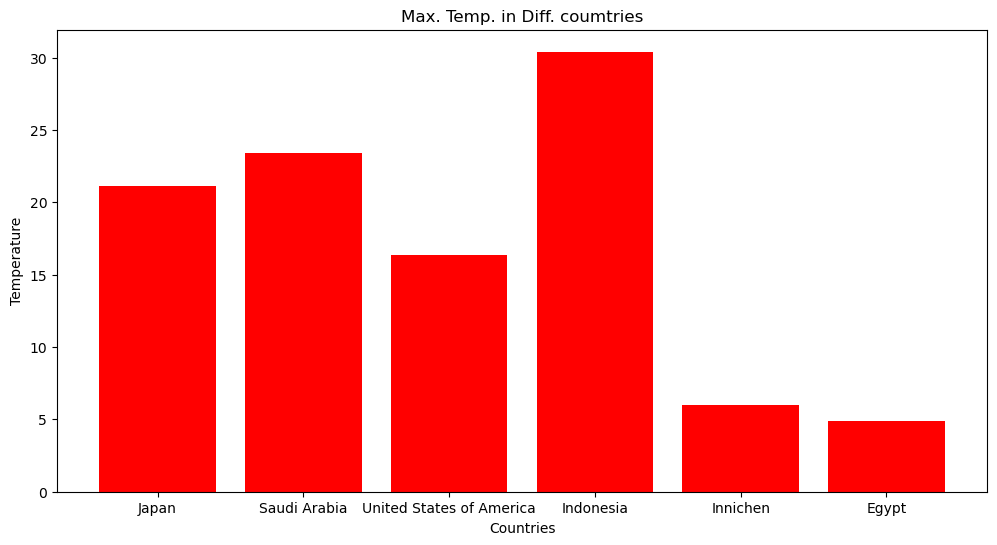

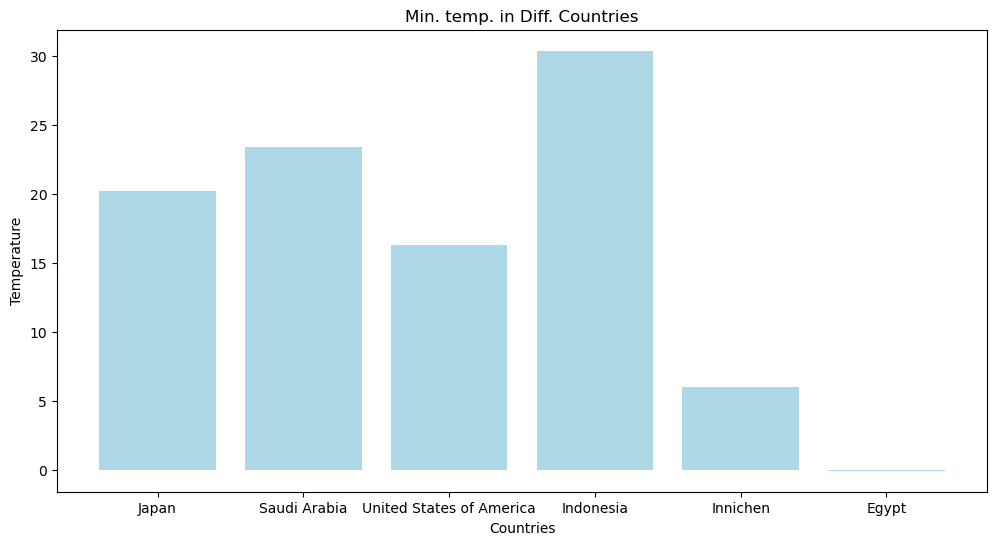

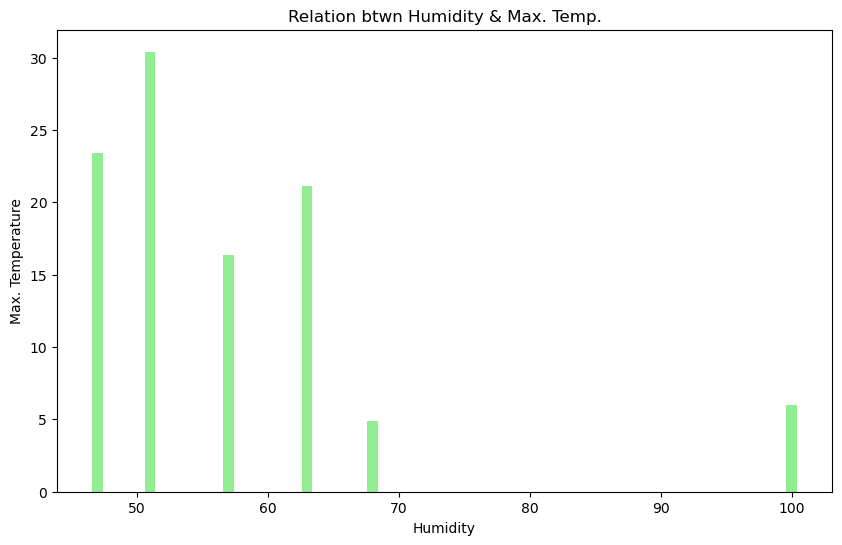

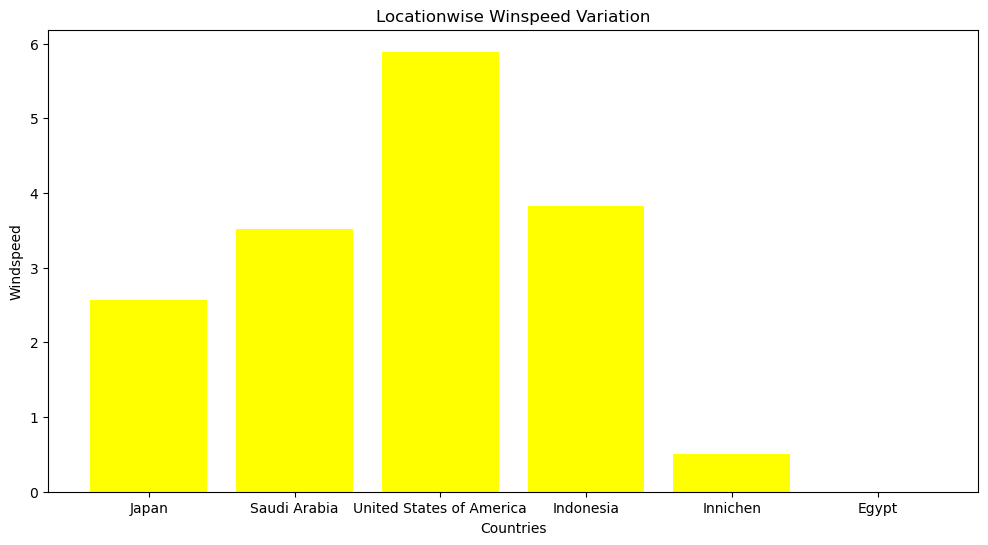

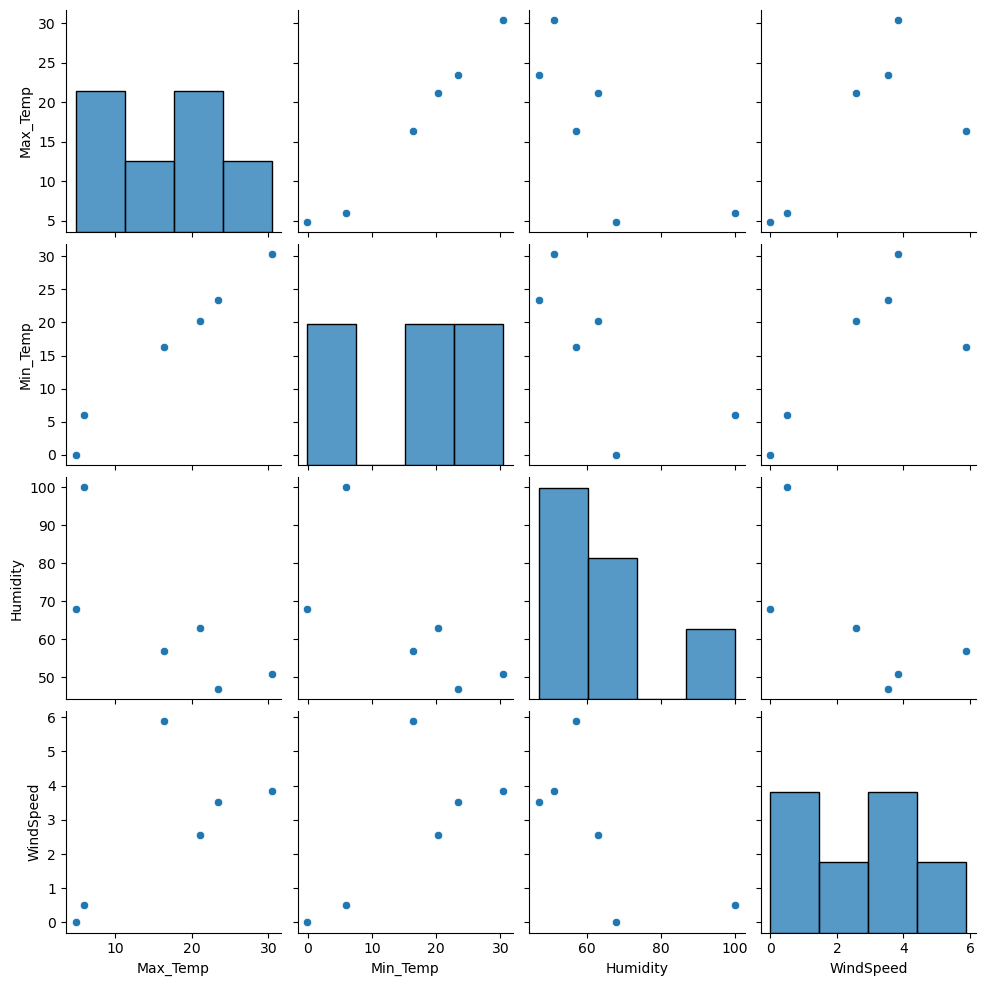

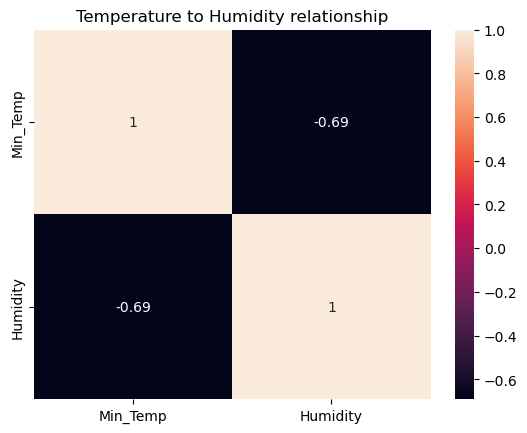

In [2]:
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns



## Reading data from openweathermap

API_key = '91dc4e027d565d766d090eec6efb196c'

countries = ['Japan' , 'Saudi Arabia' , 'United States of America' , 'Indonesia' , 'India' , 'Egypt']

country_name_list = []
maxtemp = []
mintemp = []
humidity = []
windspeed = []



for country_names in countries:

    url = f'http://api.openweathermap.org/data/2.5/weather?q={country_names}&APPID={API_key}&units=metric'

    r = requests.get(url)
        
    data = r.json()
        
    formatted_json = json.dumps(data, sort_keys = True, indent = 4)
    
#     print(data)
    country_name_list.append(data['name'])
    maxtemp.append(data['main']['temp_max'])
    mintemp.append(data['main']['temp_min'])
    humidity.append(data['main']['humidity'])
    windspeed.append(data['wind']['speed'])
            

df = pd.DataFrame()
df['Names'] = country_name_list
df['Max_Temp'] = maxtemp
df['Min_Temp'] = mintemp
df['Humidity'] = humidity
df['WindSpeed'] = windspeed

df.head()    

df

df.describe()


df.info()


## Data cleaning

df.isna().sum()


df.duplicated().sum()


## Data analysis


average_temperature = df.groupby('Names')['Max_Temp'].mean()
average_temperature


average_temperature = df.groupby('Names')['Min_Temp'].mean()
average_temperature




## Data visualization


plt.figure(figsize=(12,6))
plt.bar(df['Names'],df['Max_Temp'], color = 'red')
plt.title('Max. Temp. in Diff. coumtries')
plt.xlabel('Countries')
plt.ylabel('Temperature')
plt.show()


plt.figure(figsize=(12,6))
plt.bar(df['Names'],df['Min_Temp'],color = 'lightblue')
plt.title('Min. temp. in Diff. Countries')
plt.xlabel('Countries')
plt.ylabel('Temperature')
plt.show()



plt.figure(figsize=(10,6))
plt.bar(df['Humidity'],df['Max_Temp'],color='lightgreen')
plt.title('Relation btwn Humidity & Max. Temp.')
plt.xlabel('Humidity')
plt.ylabel('Max. Temperature')
plt.show()


plt.figure(figsize=(12,6))
plt.bar(df['Names'],df['WindSpeed'],color='yellow')
plt.title('Locationwise Winspeed Variation')
plt.xlabel('Countries')
plt.ylabel('Windspeed')
plt.show()


sns.pairplot(df)
plt.show()


corre = df[['Min_Temp','Humidity']].corr()
sns.heatmap(corre, annot=True)
plt.title("Temperature to Humidity relationship")
plt.show()